In [4]:
!pip install sentence-transformers scikit-learn numpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

class ResumeMatcher:
    def __init__(self):
        # Load a pre-trained BERT model (Small, fast, and powerful)
        # using 'all-MiniLM-L6-v2' which is optimized for semantic search
        print("Loading AI Model (all-MiniLM-L6-v2)...")
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

    def get_embedding(self, text):
        """Converts text into a 384-dimensional dense vector."""
        return self.model.encode(text)

    def match(self, job_description, resumes):
        """
        Compares JD vector against Resume vectors using Cosine Similarity.
        Returns a list of tuples: (candidate_name, match_percentage)
        """
        print("\nProcessing Semantic Matching...")
        
        # 1. Vectorize the Job Description
        # Reshape is needed for sklearn cosine_similarity (expects 2D array)
        jd_vector = self.get_embedding(job_description).reshape(1, -1)
        
        results = []
        
        # 2. Vectorize and Compare each Resume
        for person, text in resumes.items():
            resume_vector = self.get_embedding(text).reshape(1, -1)
            
            # Math: Calculate Cosine Similarity (Result is between -1 and 1)
            similarity_score = cosine_similarity(jd_vector, resume_vector)[0][0]
            
            # Convert to percentage
            percentage = round(similarity_score * 100, 2)
            results.append((person, percentage))
            
        # 3. Sort by highest match percentage
        results.sort(key=lambda x: x[1], reverse=True)
        return results

# --- MOCK DATA ---
job_desc = """
We are looking for a Python Developer with AI experience. 
Must know Machine Learning, Scikit-Learn, and Vector Databases.
Experience with API development (Flask/FastAPI) is a plus.
"""

candidates = {
    "Candidate A (Web Dev)": "I am a React developer. I know JavaScript, CSS, HTML, and Node.js. I build front-end websites.",
    "Candidate B (Junior ML)": "I know Python and Pandas. I have built some basic regression models. I am learning AI.",
    "Candidate C (Your Profile)": "I am an M.Tech scholar in AI. Expert in Python, Scikit-Learn, and Vector Search (Pinecone). I have built APIs using Flask."
}

# --- EXECUTION ---
if __name__ == "__main__":
    matcher = ResumeMatcher()
    ranked_candidates = matcher.match(job_desc, candidates)

    print(f"\nJOB DESCRIPTION: {job_desc.strip()}")
    print("-" * 50)
    print("RANKING CANDIDATES:")
    
    for rank, (name, score) in enumerate(ranked_candidates, 1):
        bar = "█" * int(score / 5)
        print(f"{rank}. {name} : {score}% Match \t|{bar}")

c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading AI Model (all-MiniLM-L6-v2)...

Processing Semantic Matching...

JOB DESCRIPTION: We are looking for a Python Developer with AI experience. 
Must know Machine Learning, Scikit-Learn, and Vector Databases.
Experience with API development (Flask/FastAPI) is a plus.
--------------------------------------------------
RANKING CANDIDATES:
1. Candidate C (Your Profile) : 67.08000183105469% Match 	|█████████████
2. Candidate B (Junior ML) : 62.810001373291016% Match 	|████████████
3. Candidate A (Web Dev) : 33.63999938964844% Match 	|██████


In [2]:
import numpy as np
import os
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from pdf_loader import load_resumes_from_folder  # Imports your new script

# --- 1. DEFINE THE AI MODEL ---
class ResumeMatcher:
    def __init__(self):
        # Load the BERT model (lightweight and fast)
        print("⏳ Loading AI Model (all-MiniLM-L6-v2)...")
        self.model = SentenceTransformer('all-MiniLM-L6-v2')

    def get_embedding(self, text):
        # Convert text to vector
        return self.model.encode(text)

    def match(self, job_description, resumes):
        print("Processing Semantic Matching...")
        
        # Vectorize Job Description
        jd_vector = self.get_embedding(job_description).reshape(1, -1)
        
        results = []
        
        # Loop through all resumes
        for filename, text in resumes.items():
            # Vectorize Candidate Resume
            resume_vector = self.get_embedding(text).reshape(1, -1)
            
            # Calculate Cosine Similarity
            similarity = cosine_similarity(jd_vector, resume_vector)[0][0]
            percentage = round(similarity * 100, 2)
            
            results.append((filename, percentage))
            
        # Sort by highest score
        results.sort(key=lambda x: x[1], reverse=True)
        return results

# --- 2. CONFIGURATION ---
# Make sure you created a folder named 'resumes' and put PDF files inside!
RESUME_FOLDER = "resumes"

JOB_DESCRIPTION = """
We are looking for a Python Developer with AI experience. 
Must know Machine Learning, Scikit-Learn, and Vector Databases.
Experience with API development (Flask/FastAPI) is a plus.
"""

# --- 3. MAIN EXECUTION ---
if __name__ == "__main__":
    print(f"Scanning folder: '{RESUME_FOLDER}'...")
    
    # Load PDFs using your helper script
    candidates = load_resumes_from_folder(RESUME_FOLDER)
    
    if not candidates:
        print(" No PDFs found! Please add .pdf files to the 'resumes' folder.")
    else:
        print(f" Successfully loaded {len(candidates)} resumes.")
        
        # Run the Matcher
        matcher = ResumeMatcher()
        ranked_list = matcher.match(JOB_DESCRIPTION, candidates)

        # Print the Results
        print("\n" + "="*50)
        print(f"JOB TARGET: {JOB_DESCRIPTION.splitlines()[1]}...") # Print first line of JD
        print("="*50)
        print("CANDIDATE RANKING:")
        
        for rank, (name, score) in enumerate(ranked_list, 1):
            # Create a visual bar chart
            bar_length = int(score / 4) 
            bar = "█" * bar_length
            print(f"{rank}. {name} \n   Match: {score}%  |{bar}")
            print("-" * 50)

c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OSError: [WinError 1455] The paging file is too small for this operation to complete. Error loading "c:\Users\mohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\torch\lib\torch_python.dll" or one of its dependencies.

In [2]:
!pip install pypdf


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Loaded: Kambam_Mohankalyan_1.pdf
Loading AI Model (all-MiniLM-L6-v2)...

Processing Semantic Matching...
📊 Report saved successfully: ranking_report.csv


c:\Users\mohan\Downloads\daily_git_leetcode\analytics.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Match Score", y="Candidate Name", data=df, palette="viridis")


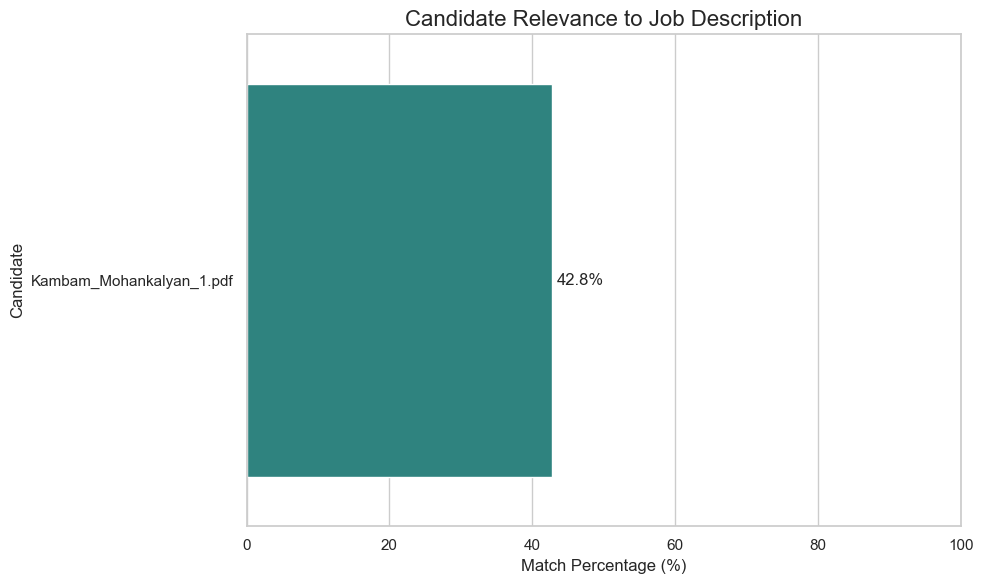

In [5]:
# --- IMPORTS ---
from pdf_loader import load_resumes_from_folder
from analytics import export_results, plot_results  # <--- New Import

# --- CONFIGURATION ---
RESUME_FOLDER = "resumes"
JOB_DESCRIPTION = """
We are looking for a Python Developer with AI experience. 
Must know Machine Learning, Scikit-Learn, and Vector Databases.
Experience with API development (Flask/FastAPI) is a plus.
"""

# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # 1. Load Data
    candidates = load_resumes_from_folder(RESUME_FOLDER)
    
    if candidates:
        # 2. Run AI Matcher
        matcher = ResumeMatcher()
        ranked_list = matcher.match(JOB_DESCRIPTION, candidates)

        # 3. Export to CSV (The new feature)
        export_results(ranked_list)

        # 4. Visualize (The new feature)
        plot_results(ranked_list)
        
    else:
        print("⚠️ No resumes found. Please add PDFs to the folder.")